# Aufgaben zur instationäre Wärmeleitung in einer Wand

## Aufgabe 1.2

In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from odesolve import *
from instationaer_ar import *
from instationaer_hilfsfunktionen import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Wandschichten und Randbedingungen

In [7]:
wall = [
    WallLayer(0.115, 1.00, 1000, 1800),
    WallLayer(0.200, 0.04, 900, 50),
    WallLayer(0.250, 2.30, 1000, 2400)
]

def ti(t):
    return 20

def ta(t):
    ω = 2 * pi / (24 * 3600)
    return 5 - 10 * cos(ω * t)

rbi = Boundary(7.5, ti)
rba = Boundary(25.0, ta)

Test für drei Schichten

In [8]:
A, r = compute_ar(wall, rba, rbi)
Aref = 1e-3 * np.array([[0.1227, -0.0019, 0], [-0.0434, 0.0869, -0.0435], [0, -0.0007, 0.0132]])
r00ref = 1e-3 * np.array([-0.6039, 0, 0.25])
r12ref = np.array([0.0018, 0, 0.0003])
print("    A OK: ", np.linalg.norm(A - Aref) < 1e-6)
print("r( 0) OK: ", np.linalg.norm(r(0) - r00ref) < 1e-6)
print("r(12) OK: ", np.linalg.norm(r(12 * 3600) - r12ref) < 1e-4)

    A OK:  True
r( 0) OK:  True
r(12) OK:  True


Feine Unterteilung

In [10]:
wall_r = refine_wall_layers(wall, 0.025)
A, r = compute_ar(wall_r, rba, rbi)

## Punkt 2: Stationäre Lösung

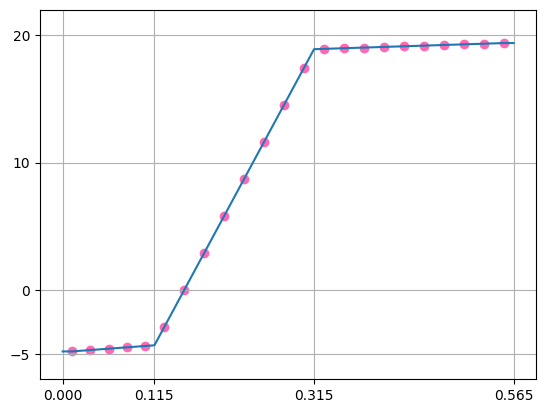

In [11]:
theta0 = np.linalg.solve(A, r(0))
plot_temp(wall_r, theta0)

## Punkt 3: Transiente Berechnung

In [12]:
def F(t, theta):
    return -A @ theta + r(t)

ht = 60
t, theta = rungekutta(F, [0, 72 * 3600], ht, theta0)

Plot über die Zeit

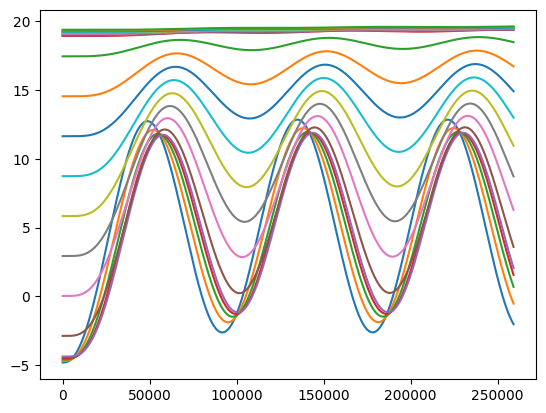

In [13]:
plot_sol(t, theta)

Plot über den Ort

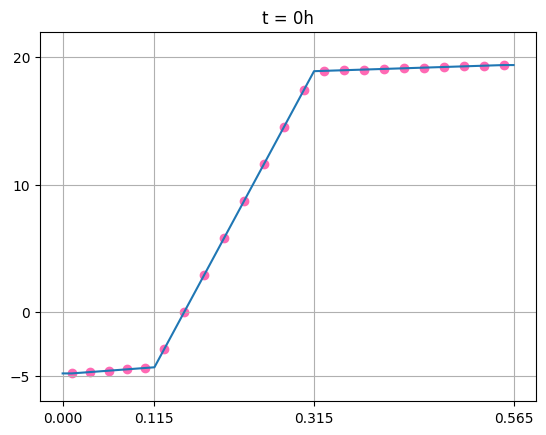

In [14]:
plot_temp(wall_r, theta[1, :], "t = 0h")

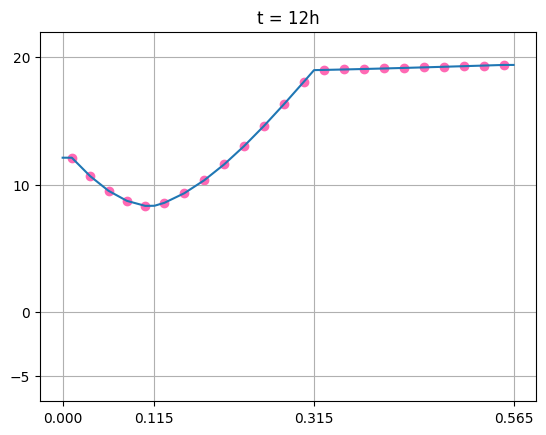

In [15]:
plot_temp(wall_r, theta[index(12, ht), :],"t = 12h")

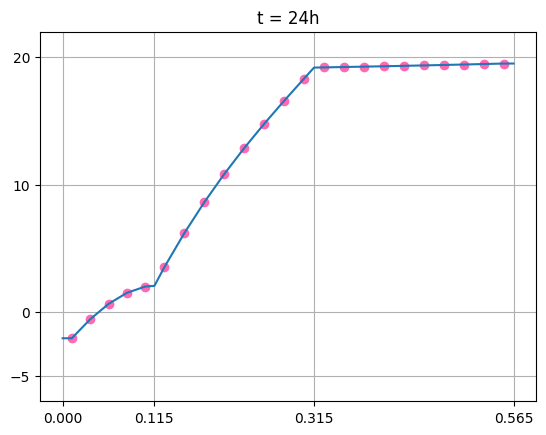

In [16]:
plot_temp(wall_r, theta[index(24, ht), :], "t = 24h")